In [22]:
import nltk
import random
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC, SVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os
import zipfile

In [14]:
with zipfile.ZipFile('/content/neg.zip', 'r') as zip_ref:
    # Extract the file names
    files_neg = zip_ref.namelist()
    # Read the contents of each file
    files_neg = [zip_ref.read(f).decode('utf8') for f in files_neg]

In [13]:
with zipfile.ZipFile('/content/pos.zip', 'r') as zip_ref:
    # Extract the file names
    files_pos = zip_ref.namelist()
    # Read the contents of each file
    files_pos = [zip_ref.read(f).decode('utf8') for f in files_pos]

In [15]:
len(files_pos), len(files_neg)

(8177, 2656)

In [16]:
files_pos=files_pos[0:1000]
files_neg=files_neg[0:1000]

In [17]:
len(files_pos), len(files_neg)

(1000, 1000)

In [25]:
all_words = []
documents = []

import nltk
from nltk.corpus import stopwords
import re
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop_words = stopwords.words('english')
# j is adject, r is adverb, v verb
allowed_word_types = ["J"]

for p in files_pos:
    documents.append( (p, "pos") )

    #remove panctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]', '', p)

    tokenizer = word_tokenize(cleaned)

    stopped = [w for w in tokenizer if not w in stop_words]

    pos = nltk.pos_tag(stopped)

    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

for p in files_neg:
    documents.append( (p, "pos") )

    #remove panctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]', '', p)

    tokenizer = word_tokenize(cleaned)

    stopped = [w for w in tokenizer if not w in stop_words]

    neg = nltk.pos_tag(stopped)

    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'bad': 1144, 'good': 1120, 'much': 498, 'many': 450, 'little': 448, 'great': 408, 'first': 332, 'br': 310, 'worst': 300, 'real': 280, ...})

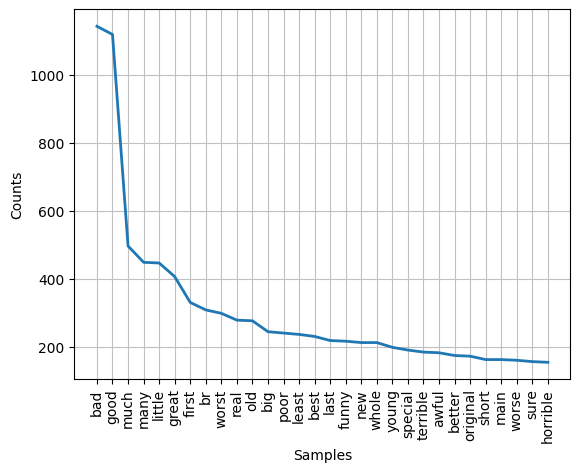

In [27]:
import matplotlib.pyplot as plt
all_words.plot(30, cumulative=False)
plt.show()

In [ ]:
word_features = list(all_words.keys())[:1000]
word_features

In [29]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

training_set = featuresets[:800]
testing_set = featuresets[800:]

In [30]:
find_features

<function __main__.find_features(document)>

In [31]:
featuresets[1]

({'unnatural': False,
  'terrific': False,
  'absurd': False,
  'formal': False,
  'insane': False,
  'violent': False,
  'crazy': False,
  'general': False,
  'narrative': False,
  'cryptic': False,
  'easy': False,
  'third': False,
  'technical': False,
  'good': False,
  'great': False,
  'interesting': False,
  'bad': False,
  'wooden': False,
  'learnt': False,
  'new': False,
  'flashy': False,
  'symbolic': False,
  'decent': False,
  'ok': False,
  'best': False,
  'able': False,
  'awful': False,
  'first': False,
  'short': False,
  'cheap': False,
  'half': False,
  'name': False,
  'overall': False,
  'perfetic': False,
  'noteworthy': False,
  'total': False,
  'dark': False,
  'troubled': False,
  'gritty': False,
  'doesnt': False,
  'br': True,
  'couple': False,
  'watch': False,
  'nap': False,
  'valuable': False,
  'rich': False,
  'bunch': False,
  'public': False,
  'descent': False,
  'right': False,
  'middle': False,
  'flown': False,
  'fast': False,
  'diffe

In [32]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("classifier accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)

classifier accuracy percent: 100.0


In [35]:
classifier.show_most_informative_features(20)

Most Informative Features
